### Deep Learning: Classification
___

#### Summary:

Deep Learning has grown in popularity recently due to better GPUs and the large amount of data we have access to. Combining the large amount of data with better GPUs, we are able to train deep neural networks in a reasonable amount of time that outperform traditional machine learning models such as SVM, Naive Bayes and K-Nearest Neighbor.

When building a deep neural network, it is common to use APIs like Tensorflow and Keras. Tensorflow is an API that runs on top of Python, and Keras is an API that runs on top of Tensorflow. When building a neural network, Keras will usually contain all the tools we need. Note that there we will not get into hyperparameter tuning here and will not use the validation set (The test set is used as the validaiton set here).
___
#### This notebook will include:
1. Softmax Regression
2. Support Vector Machine
3. 3-Layer Standard Neural Network (Multilayer Perceptron)
4. 8-Layer Standard Neural Network
5. 3-Layer Convolutional Network
6. 8-Layer Convolutional Network
7. Inception Network
8. Residual Network
___
#### Reference: 

Much of what is in this notebook was learned from the Deep Learning Specialization Coursera course by Andrew Ng and from the Tensorflow tutorial at https://www.tensorflow.org/get_started/mnist/pros 

Extracting Datasets/MNIST/train-images-idx3-ubyte.gz
Extracting Datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting Datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting Datasets/MNIST/t10k-labels-idx1-ubyte.gz
X_train: (55000, 784)
y_train: (55000,)
X_val: (5000, 784)
y_val: (5000,)
X_test: (10000, 784)
y_test: (10000,)


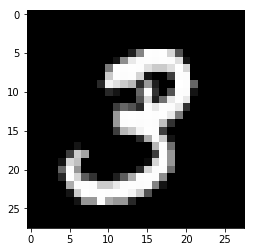

In [5]:
"""
The dataset that will be used for this notebook is the MNIST dataset which consists of hand-drawn digits
ranging from 0 to 9. The dataset is separated into 55000 training examples, 5000 validation examples
and 10000 test examples. Each example consists of 784 input features corresponding to the 784 pixel 
values of the 28x28 sized image. The dataset has already been preprocessed (divided by 255).
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# Importing the dataset (not one-hot encoded)
from tensorflow.examples.tutorials.mnist import input_data
dataset = input_data.read_data_sets("Datasets/MNIST/", one_hot=False)

X_train = dataset.train.images
y_train = dataset.train.labels
X_val = dataset.validation.images
y_val = dataset.validation.labels
X_test = dataset.test.images
y_test = dataset.test.labels

# Printing the dataset shape
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

# Displaying an example from the dataset
sample = Image.fromarray(255*dataset.train.images[1, :].reshape(28,28))
plt.imshow(sample)

In [8]:
# Softmax Regression
"""
The simplest approach to a classification problem with more than 2 categories is to apply softmax
regression. Since softmax regression is essentially a single-layer neural network, it is expected
to perform poorly. 
"""
# Creating and fitting the logistic regression model to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Printing the accuracy on the training set
print('training accuracy', classifier.score(X_train, y_train))

# Printing the accuracy on the test set
print('test accuracy', classifier.score(X_test, y_test))

training accuracy 0.928109090909
test accuracy 0.9198


In [11]:
# Support Vector Machine with Gaussian Kernel
"""
The SVM classifier with a Gaussian kernel works well for most classification problems when there isn't
much data, however if the training set is very large, training the model can take very long. That is 
why for this problem we train on a subset of the training set.
"""
# Obtaining a subset of the training set
X_train_sample, y_train_sample = dataset.train.next_batch(5000)

# Creating and fitting the SVM model to the training subset
from sklearn import svm
classifier = svm.SVC(kernel = 'rbf', decision_function_shape='ovr')
classifier.fit(X_train_sample, y_train_sample) 

# Printing the accuracy on the training subset
print('training accuracy', classifier.score(X_train_sample, y_train_sample))

# Printing the accuracy on the test set
print('test accuracy', classifier.score(X_test, y_test))

training accuracy 0.92
test accuracy 0.9126


In [12]:
"""
For the remaining classifiers, the label needs to be one-hot encoded so in this section we import the 
dataset again but with one-hot encoding enabled.
"""
# Importing the dataset (one-hot encoded)
from tensorflow.examples.tutorials.mnist import input_data
dataset = input_data.read_data_sets("Datasets/MNIST/", one_hot=True)

X_train = dataset.train.images
y_train = dataset.train.labels
X_val = dataset.validation.images
y_val = dataset.validation.labels
X_test = dataset.test.images
y_test = dataset.test.labels

# Printing the dataset shape
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

Extracting Datasets/MNIST/train-images-idx3-ubyte.gz
Extracting Datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting Datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting Datasets/MNIST/t10k-labels-idx1-ubyte.gz
X_train: (55000, 784)
y_train: (55000, 10)
X_val: (5000, 784)
y_val: (5000, 10)
X_test: (10000, 784)
y_test: (10000, 10)


In [22]:
# 3-Layer Standard Neural Network (Multilayer Perceptron)
"""
A 3-layer neural network, although not deep, has enough layers to outperform traditional Machine
Learning algorithms. These extra layers allow the network to learn more complex features that can 
be useful for classification. 
"""
# Importing the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

# Creating and fitting the 3-layer neural network to the training set
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', input_dim = 784, activation = 'relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 128, epochs = 100)

# Printing the accuracy on the training subset
print('training accuracy', classifier.evaluate(X_train, y_train)[1])

# Printing the accuracy on the test set
print('test accuracy', classifier.evaluate(X_test, y_test)[1])

Extracting Datasets/MNIST/train-images-idx3-ubyte.gz
Extracting Datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting Datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting Datasets/MNIST/t10k-labels-idx1-ubyte.gz
Epoch 1/100
55000/55000 [==============================] - 3s 49us/step - loss: 0.7748 - acc: 0.7691
Epoch 2/100
55000/55000 [==============================] - 2s 42us/step - loss: 0.3197 - acc: 0.9079
Epoch 3/100
55000/55000 [==============================] - 2s 41us/step - loss: 0.2648 - acc: 0.9242
Epoch 4/100
55000/55000 [==============================] - 2s 41us/step - loss: 0.2257 - acc: 0.9346
Epoch 5/100
55000/55000 [==============================] - 2s 41us/step - loss: 0.1973 - acc: 0.9435
Epoch 6/100
55000/55000 [==============================] - 2s 41us/step - loss: 0.1780 - acc: 0.9482
Epoch 7/100
55000/55000 [==============================] - 2s 41us/step - loss: 0.1623 - acc: 0.9525
Epoch 8/100
55000/55000 [==============================] - 2s 41us/step - loss: 0.1

In [23]:
# 8-Layer Standard Neural Network
"""
An 8-layer neural network is considered a deep network. Because it has more layers it should be able to
learn even more complex features that can be useful for classification. 
"""
# Importing the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

# Creating and fitting the 8-layer neural network to the training set
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', input_dim = 784, activation = 'relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 128, epochs = 100)

# Printing the accuracy on the training subset
print('training accuracy', classifier.evaluate(X_train, y_train)[1])

# Printing the accuracy on the test set
print('test accuracy', classifier.evaluate(X_test, y_test)[1])

Epoch 1/100
55000/55000 [==============================] - 4s 71us/step - loss: 1.7412 - acc: 0.3098
Epoch 2/100
55000/55000 [==============================] - 3s 60us/step - loss: 0.9730 - acc: 0.6485
Epoch 3/100
55000/55000 [==============================] - 3s 60us/step - loss: 0.6444 - acc: 0.8006
Epoch 4/100
55000/55000 [==============================] - 3s 60us/step - loss: 0.4789 - acc: 0.8650
Epoch 5/100
55000/55000 [==============================] - 3s 60us/step - loss: 0.3849 - acc: 0.8942
Epoch 6/100
55000/55000 [==============================] - 3s 59us/step - loss: 0.3252 - acc: 0.9108
Epoch 7/100
55000/55000 [==============================] - 3s 59us/step - loss: 0.2837 - acc: 0.9227
Epoch 8/100
55000/55000 [==============================] - 3s 60us/step - loss: 0.2554 - acc: 0.9312
Epoch 9/100
55000/55000 [==============================] - 3s 60us/step - loss: 0.2337 - acc: 0.9368
Epoch 10/100
55000/55000 [==============================] - 3s 59us/step - loss: 0.2136 - a

In [36]:
# 3-layer Convolutional Network
"""
A Convolutional network performs much better than standard neural networks when it comes to computer 
vision tasks. This is because it tries to learn features or rather feature detectors from groups of 
pixels, taking into account the shape of the image. The parameters learned come in the form of filters. 
There are also considerable fewer parameters, which result from parameter sharing and sparsity of 
connections. This particular ConvNet has 1 convolutional layer, 1 fully-connected layer, and an output 
layer.
"""
# Importing the libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Reshaping the images to be of shape 28x28x1
X_train_image = X_train.reshape( -1, 28, 28, 1)
X_val_image = X_val.reshape( -1, 28, 28, 1)
X_test_image = X_test.reshape( -1, 28, 28, 1)

# Creating and fitting the 3-layer CNN to the training set
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train_image, y_train, batch_size = 128, epochs = 100)

# Printing the accuracy on the training subset
print('training accuracy', classifier.evaluate(X_train_image, y_train)[1])

# Printing the accuracy on the test set
print('test accuracy', classifier.evaluate(X_test_image, y_test)[1])

Epoch 1/100
55000/55000 [==============================] - 51s 933us/step - loss: 0.2309 - acc: 0.9337
Epoch 2/100
55000/55000 [==============================] - 4s 75us/step - loss: 0.0675 - acc: 0.9802
Epoch 3/100
55000/55000 [==============================] - 4s 75us/step - loss: 0.0462 - acc: 0.9859
Epoch 4/100
55000/55000 [==============================] - 4s 74us/step - loss: 0.0349 - acc: 0.9896
Epoch 5/100
55000/55000 [==============================] - 4s 75us/step - loss: 0.0250 - acc: 0.9924
Epoch 6/100
55000/55000 [==============================] - 4s 75us/step - loss: 0.0202 - acc: 0.9940
Epoch 7/100
55000/55000 [==============================] - 4s 75us/step - loss: 0.0156 - acc: 0.9952
Epoch 8/100
55000/55000 [==============================] - 4s 75us/step - loss: 0.0111 - acc: 0.9967
Epoch 9/100
55000/55000 [==============================] - 5s 97us/step - loss: 0.0082 - acc: 0.9976
Epoch 10/100
55000/55000 [==============================] - 6s 116us/step - loss: 0.0069 

In [37]:
# 8-layer Convolutional Network
"""
The deeper a Convolutional network is, the more complex features it can learn. These complex features
may be useful in classifying an image. This particular ConvNet has 5 convolutional layer, 
2 fully-connected layer, and an output layer.
"""
# Importing the libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Reshaping the images to be of shape 28x28x1
X_train_image = X_train.reshape( -1, 28, 28, 1)
X_val_image = X_val.reshape( -1, 28, 28, 1)
X_test_image = X_test.reshape( -1, 28, 28, 1)

# Creating and fitting the 8-layer CNN to the training set
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train_image, y_train, batch_size = 128, epochs = 100)

# Printing the accuracy on the training subset
print('training accuracy', classifier.evaluate(X_train_image, y_train)[1])

# Printing the accuracy on the test set
print('test accuracy', classifier.evaluate(X_test_image, y_test)[1])

Epoch 1/100
55000/55000 [==============================] - 11s 201us/step - loss: 0.2483 - acc: 0.9240
Epoch 2/100
55000/55000 [==============================] - 9s 160us/step - loss: 0.0607 - acc: 0.9811
Epoch 3/100
55000/55000 [==============================] - 9s 159us/step - loss: 0.0440 - acc: 0.9866
Epoch 4/100
55000/55000 [==============================] - 9s 166us/step - loss: 0.0342 - acc: 0.9894
Epoch 5/100
55000/55000 [==============================] - 8s 152us/step - loss: 0.0281 - acc: 0.9911
Epoch 6/100
55000/55000 [==============================] - 8s 151us/step - loss: 0.0244 - acc: 0.9922
Epoch 7/100
55000/55000 [==============================] - 8s 151us/step - loss: 0.0206 - acc: 0.9934
Epoch 8/100
55000/55000 [==============================] - 8s 149us/step - loss: 0.0175 - acc: 0.9941
Epoch 9/100
55000/55000 [==============================] - 8s 151us/step - loss: 0.0164 - acc: 0.9946
Epoch 10/100
55000/55000 [==============================] - 8s 151us/step - loss:

In [64]:
# Inception Network
"""
An inception network lets the network choose which filters to use when classifying an image. It is 
composed of many inception blocks where an inception block consists of many different convolutions 
with different filters concatenated into one. The network below consists of 3 inception blocks. 
"""
# Importing the libraries
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Concatenate
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model

# Reshaping the images to be of shape 28x28x1
X_train_image = X_train.reshape( -1, 28, 28, 1)
X_val_image = X_val.reshape( -1, 28, 28, 1)
X_test_image = X_test.reshape( -1, 28, 28, 1)

# Defining the Inception block
def inception_block(input):
    branch_1 = Conv2D(64, (1, 1), activation = 'relu', padding = 'same')(input)
    branch_2 = Conv2D(96, (1, 1), activation = 'relu', padding = 'same')(input)
    branch_2 = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(branch_2)
    branch_3 = Conv2D(16, (1, 1), activation = 'relu', padding = 'same')(input)
    branch_3 = Conv2D(32, (5, 5), activation = 'relu', padding = 'same')(branch_3)
    branch_4 = MaxPooling2D(pool_size = (3, 3), strides = (1, 1), padding = 'same')(input)
    branch_4 = Conv2D(32, (1, 1), activation = 'relu', padding = 'same')(branch_4)
    output = Concatenate(axis=-1)([branch_1, branch_2, branch_3, branch_4])
    return output

# Creating and fitting the Inception Network to the training set
X_input = Input((28, 28, 1))
X = inception_block(X_input)
X = inception_block(X)
X = inception_block(X)
X = Flatten()(X)
X = Dense(units=10, kernel_initializer = 'glorot_uniform', activation='softmax')(X)

classifier = Model(inputs = X_input, outputs = X)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.fit(X_train_image, y_train, batch_size = 128, epochs = 100)

# Printing the accuracy on the training subset
print('training accuracy', classifier.evaluate(X_train_image, y_train)[1])

# Printing the accuracy on the test set
print('test accuracy', classifier.evaluate(X_test_image, y_test)[1])

Epoch 1/100
55000/55000 [==============================] - 127s 2ms/step - loss: 0.1323 - acc: 0.9593
Epoch 2/100
55000/55000 [==============================] - 125s 2ms/step - loss: 0.0405 - acc: 0.9879
Epoch 3/100
55000/55000 [==============================] - 125s 2ms/step - loss: 0.0271 - acc: 0.9912
Epoch 4/100
55000/55000 [==============================] - 125s 2ms/step - loss: 0.0186 - acc: 0.9943
Epoch 5/100
55000/55000 [==============================] - 124s 2ms/step - loss: 0.0137 - acc: 0.9955
Epoch 6/100
55000/55000 [==============================] - 124s 2ms/step - loss: 0.0121 - acc: 0.9959
Epoch 7/100
55000/55000 [==============================] - 124s 2ms/step - loss: 0.0092 - acc: 0.9969
Epoch 8/100
55000/55000 [==============================] - 124s 2ms/step - loss: 0.0075 - acc: 0.9973
Epoch 9/100
55000/55000 [==============================] - 125s 2ms/step - loss: 0.0071 - acc: 0.9977
Epoch 10/100
55000/55000 [==============================] - 123s 2ms/step - loss: 

In [6]:
# Residual Network
"""
Vanishing/exploding gradients is a common problem that occurs when having a very deep network. Residual
networks (ResNets) combined with the use of batch normalization helps resolve this problem. Using a 
ResNet, we are able to train networks with over 100 layers. Residual networks are made up of a series 
of residual blocks. These blocks contain a 'skip connection' that allows the gradient to be directly
backpropagated to earlier layers. There are 2 main types of residual blocks; they are the identity
block (input has same dimension as output) and the convolutional block (input has a different dimension
from output). A ResNet is made up of a series of many of these different blocks. This particular Resnet
consists of 65 layers.
"""
# Importing the libraries
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import ZeroPadding2D
from keras.layers import Activation
from keras.layers import Add
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Model

# Reshaping the images to be of shape 28x28x1
X_train_image = X_train.reshape( -1, 28, 28, 1)
X_val_image = X_val.reshape( -1, 28, 28, 1)
X_test_image = X_test.reshape( -1, 28, 28, 1)

# Defining the identity block function (output dimension same as input dimension)
def identity_block(input, filters, kernel_size):
    F1, F2, F3 = filters 
    output = Conv2D(F1, (1, 1), padding = 'valid')(input)
    output = BatchNormalization(axis = -1)(output)
    output = Activation('relu')(output)
    output = Conv2D(F2, (kernel_size, kernel_size), padding = 'same')(output)
    output = BatchNormalization(axis = -1)(output)
    output = Activation('relu')(output)
    output = Conv2D(F3, (1, 1), padding = 'valid')(output)
    output = BatchNormalization(axis = -1)(output)
    output = Add()([output, input])
    output = Activation('relu')(output)
    
    return output
    
# Defining the convolutional block function (output dimension different from input dimension)
def convolutional_block(input, filters, kernel_size, strides):
    F1, F2, F3 = filters
    output = Conv2D(F1, (1, 1), strides = (strides, strides), padding = 'valid')(input)
    output = BatchNormalization(axis = -1)(output)
    output = Activation('relu')(output)
    output = Conv2D(F2, (kernel_size, kernel_size), padding = 'same')(output)
    output = BatchNormalization(axis = -1)(output)
    output = Activation('relu')(output)
    output = Conv2D(F3, (1, 1), padding = 'valid')(output)
    output = BatchNormalization(axis = -1)(output)
    output_sc = Conv2D(F3, (1, 1), strides = (strides, strides), padding = 'valid')(input)
    output_sc = BatchNormalization(axis = -1)(output_sc)
    output = Add()([output, output_sc])
    output = Activation('relu')(output)
    
    return output

# Creating and fitting the Residual Network to the training set
X_input = Input((28, 28, 1))
X = ZeroPadding2D((2, 2))(X_input)
X = Conv2D(32, (3, 3), padding = 'same', strides = (2,2))(X)
X = BatchNormalization(axis = -1)(X)
X = Activation('relu')(X)
X = convolutional_block(X, filters = [32, 32, 128], kernel_size = 3, strides = 1)
X = identity_block(X, filters = [32, 32, 128], kernel_size = 3)
X = identity_block(X, filters = [32, 32, 128], kernel_size = 3)
X = convolutional_block(X, filters = [64, 64, 256], kernel_size = 3, strides = 2)
X = identity_block(X, filters = [64, 64, 256], kernel_size = 3)
X = identity_block(X, filters = [64, 64, 256], kernel_size = 3)
X = identity_block(X, filters = [64, 64, 256], kernel_size = 3)
X = convolutional_block(X, filters = [128, 128, 512], kernel_size = 3, strides = 2)
X = identity_block(X, filters = [128, 128, 512], kernel_size = 3)
X = identity_block(X, filters = [128, 128, 512], kernel_size = 3)
X = identity_block(X, filters = [128, 128, 512], kernel_size = 3)
X = identity_block(X, filters = [128, 128, 512], kernel_size = 3)
X = convolutional_block(X, filters = [256, 256, 1024], kernel_size = 3, strides = 2)
X = identity_block(X, filters = [256, 256, 1024], kernel_size = 3)
X = identity_block(X, filters = [256, 256, 1024], kernel_size = 3)
X = identity_block(X, filters = [256, 256, 1024], kernel_size = 3)
X = identity_block(X, filters = [256, 256, 1024], kernel_size = 3)
X = identity_block(X, filters = [256, 256, 1024], kernel_size = 3)
X = convolutional_block(X, filters = [512, 512, 2048], kernel_size = 3, strides = 2)
X = identity_block(X, filters = [512, 512, 2048], kernel_size = 3)
X = identity_block(X, filters = [512, 512, 2048], kernel_size = 3)
X = Flatten()(X)
X = Dense(units=10, kernel_initializer = 'glorot_uniform', activation='softmax')(X)

classifier = Model(inputs = X_input, outputs = X)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.fit(X_train_image, y_train, batch_size = 128, epochs = 100)

# Printing the accuracy on the training subset
print('training accuracy', classifier.evaluate(X_train_image, y_train)[1])

# Printing the accuracy on the test set
print('test accuracy', classifier.evaluate(X_test_image, y_test)[1])


Epoch 1/100
55000/55000 [==============================] - 144s 3ms/step - loss: 0.4986 - acc: 0.8562
Epoch 2/100
55000/55000 [==============================] - 126s 2ms/step - loss: 0.1074 - acc: 0.9661
Epoch 3/100
55000/55000 [==============================] - 126s 2ms/step - loss: 0.0647 - acc: 0.9795
Epoch 4/100
55000/55000 [==============================] - 126s 2ms/step - loss: 0.0519 - acc: 0.9833
Epoch 5/100
55000/55000 [==============================] - 126s 2ms/step - loss: 0.0659 - acc: 0.9807
Epoch 6/100
55000/55000 [==============================] - 126s 2ms/step - loss: 0.0526 - acc: 0.9841
Epoch 7/100
55000/55000 [==============================] - 126s 2ms/step - loss: 0.0286 - acc: 0.9913
Epoch 8/100
55000/55000 [==============================] - 121s 2ms/step - loss: 0.0256 - acc: 0.9915
Epoch 9/100
55000/55000 [==============================] - 120s 2ms/step - loss: 0.0421 - acc: 0.9874
Epoch 10/100
55000/55000 [==============================] - 120s 2ms/step - loss: 